# Import Libraries

In [27]:
import json
import csv
import ast
import pandas as pd 
import re
from datetime import date, datetime
import time
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

# Import File

In [28]:
# Import the cleaned dataframe that was exported from the reddit_cleaning file.
# Input the relevant path file and load it into the code below

df_clean_cat = pd.read_csv(r'dataframe_clean_cat.csv')

# Exploratory Data Analysis (EDA)

The following are the EDA used:
1. Number of post for each list
2. Top 10 most base on score

# Filter the dates by before covid and after covid  

This will filter the post and comments before and after covid. 
If this is not relevant for your analysis, you can skip this step and use the df_clean_cat to run the relevant codes instead.

## Create a function for date filter 

In [30]:
def before_covid(df):
  df_new = pd.DataFrame()
  t = []
  id = []
  d = []
  s = []
  cat = []
    
  for i in range(len(df['text'])):
    if datetime.strptime(df['date'].iloc[i], "%d/%m/%Y") < datetime.strptime("01/01/2020", "%d/%m/%Y"):
      t.append(df['text'].iloc[i])
      id.append(df['author'].iloc[i])
      d.append(df['date'].iloc[i])
      s.append(df['score'].iloc[i])
      cat.append(df['category'].iloc[i])

  df_new['text'] = t
  df_new['author'] = id
  df_new['date'] = d
  df_new['score'] = s
  df_new['category'] = cat        

    
  return df_new

In [31]:
def after_covid(df):

  df_new = pd.DataFrame()
  t = []
  id = []
  d = []
  s = []
  cat = []
    
  for i in range(len(df['text'])):
    if datetime.strptime(df['date'].iloc[i], "%d/%m/%Y") > datetime.strptime("31/12/2019", "%d/%m/%Y"):
      t.append(df['text'].iloc[i])
      id.append(df['author'].iloc[i])
      d.append(df['date'].iloc[i])
      s.append(df['score'].iloc[i])
      cat.append(df['category'].iloc[i])

  df_new['text'] = t
  df_new['author'] = id
  df_new['date'] = d
  df_new['score'] = s
  df_new['category'] = cat
  
  return df_new

In [32]:
df_clean_cat_bcovid =  before_covid(df_clean_cat)
df_clean_cat_acovid =  after_covid(df_clean_cat)

In [ ]:
# This code previews the dataframe to check if codes include only post and comments
# from time period after covid

df_clean_cat_acovid

## 1. Post Frequency for Each Group

The following bar graph shows the number of post each group has. It gives an idea of the number of conversations the public has with regards to the specific topics. 

This includes post frequencies of post and comments:
- Before Covid
- After Covid
- All

### Post Frequency Before Covid

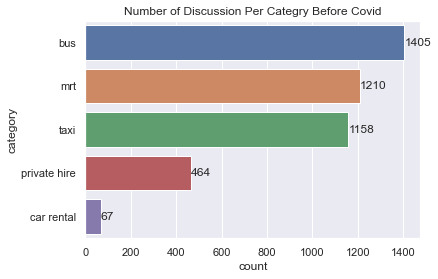

In [34]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df_clean_cat_bcovid)
ax.set_title('Number of Discussion Per Categry Before Covid')

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# This code will show the post frequency in tabular format

df_clean_cat_bcovid_table = df_clean_cat_bcovid.groupby('category').size()
df_clean_cat_bcovid_table = pd.DataFrame(df_clean_cat_bcovid_table)
df_clean_cat_bcovid_table.reset_index(level=['category'])

### Post Frequency After Covid

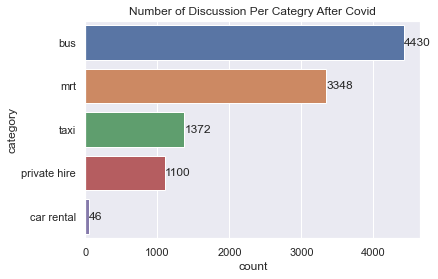

In [36]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df_clean_cat_acovid)
ax.set_title('Number of Discussion Per Categry After Covid')

for container in ax.containers:
    ax.bar_label(container)


In [ ]:
# This code will show the post frequency in tabular format

df_clean_cat_acovid_table = df_clean_cat_acovid.groupby('category').size()
df_clean_cat_acovid_table = pd.DataFrame(df_clean_cat_acovid_table)
df_clean_cat_acovid_table.reset_index(level=['category'])

### Post Frequency (All)

In [ ]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df_clean_cat)
ax.set_title('Number of Discussion Per Categry')

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# This code will show the post frequency in tabular format

df_clean_cat_table = df_clean_cat.groupby('category').size()
df_clean_cat_table = pd.DataFrame(df_clean_cat_table)
df_clean_cat_table.reset_index(level=['category'])

## 2. Preview The Top 10 Post for Each Group

To give a rough idea of what are some of the conversations happening for each topic, we will print out the top 10 post by scores.

In [38]:
# This codes sort the dataframes according to their scores

df_clean_cat_bcovid.sort_values(['category', 'score'], ascending = False, inplace = True)
df_clean_cat_acovid.sort_values(['category','score'], ascending = False, inplace = True)
df_clean_cat.sort_values(['category','score'], ascending = False, inplace = True)

### 2.1 Preview the Top 10 Post Before Covid

In [39]:
cat = df_clean_cat_bcovid['category'].unique().tolist()

In [ ]:
# This code will print the top 10 before covid discussions

for c in cat:
    print(f'=======================Top 10 Discussion for {c} Before Covid=======================')
    for t in df_clean_cat_bcovid['text'][df_clean_cat_bcovid['category'] == c].head(10).tolist():
        print(t)

### 2.2 Preview the Top 10 Post After Covid

In [ ]:
# This code will print the top 10 after covid discussions

for c in cat:
    print(f'=======================Top 10 Discussion for {c} After Covid=======================')
    for t in df_clean_cat_acovid['text'][df_clean_cat_acovid['category'] == c].head(10).tolist():
        print(t)

### 2.3 Preview the Top 10 Post (All)

In [ ]:
# This code will print the top 10 discussions

for c in cat:
    print(f'=======================Top 10 Discussion for {c} After Covid=======================')
    for t in df_clean_cat['text'][df_clean_cat['category'] == c].head(10).tolist():
        print(t)

## 3. Visualize Wordcloud of topics

### 3.1 Create functions for wordclouds

In [42]:
# This function takes in the dataframe, the stopwords that you wish to remove from the wordcloud, and the category you wish to run on

def word_cloud(data, stopword, cat):

    message = data['text'][data['category'] == cat].tolist()

    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    print(f"========================{cat}========================")
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

In [44]:
# The following code are stop words included
# Do include or exclude accordingly

stopwords = set(STOPWORDS)
stopwords.update(['mrt', 'station', 'see', 'bus', 'buses', 'line', 'account', 'one', 'full',
                  'get', 'min', 'class', 'year', 'pm', '', 'take', 'taxi', 'allow', 'last', 'almost',
                  'post', 'start', 'cross', 'car_rental', 'comfortdelgro', 'singapore', 'grab',
                  'night', 'find', 'need', 'build', 'photo', 'video', 'leave', 'car', 'train', 
                  'think', 'food', 'make', 'set', 'fresh', 'sbs', 'driver', 'delgro', 'comfort',  
                  'move',  'ever', 'blue', 'uber', 'go', 'look', 'use', 'also', 'give', 
                  'many', 'come', 'lot', 'seem', 'guess', 'definitely', 'sure', 'keep', 'much', 'already', 
                  'do', 'lol', 'people', 'well', 'back', 'week', 'u', 'want', 'day', 'will', 'know', 
                  'even', 'really', 'said', 'say', 'cab', 'public transport', 'taxis', 'public', 
                  'transport', 'thing', 'still', 'got', 'now', 's', 'stop', 'around', 'another', 'stations',
                  'smrt', 'next', 'us', 'may', 'person', 'years', 'going', 'trains', 'way', 'etc', 'makes',
                  'seat', 'guy', 'https', 'always', 'riders', 'cabbie', 'sg', 'drivers', 'auntie', 'man', 
                  'uncle', 'stops', 'someone', 'something', 'andy', 'cabs', 'cabbies', 'order', 'delivery', 
                  'gojek', 'quite','fucking', 'every', 'getting', 'trying', 'told', 'something', 'singaporean', 
                  'feel', 'lta', 'fuck', 'without', 'let', 'made', 'getting', 'passenger', 'restaurant', 'grabfood', 'door', 
                  'merchant', 'don', 't', 'customer', 'cars', 'actually', 'senior', 'entrepreneur', 'rental', 'cars', 'current'])


### 3.2 Wordcloud Before Covid

This will run the wordcloud before covid

In [ ]:
word_cloud(df_clean_cat_bcovid, stopwords, 'bus')

In [ ]:
word_cloud(df_clean_cat_bcovid, stopwords, 'mrt')

In [ ]:
word_cloud(df_clean_cat_bcovid, stopwords, 'taxi')

In [ ]:
word_cloud(df_clean_cat_bcovid, stopwords, 'private hire')

In [ ]:
word_cloud(df_clean_cat_bcovid, stopwords, 'car rental')

### 3.3 Wordcloud After Covid

This will run the wordcloud for after covid

In [ ]:
word_cloud(df_clean_cat_acovid, stopwords, 'bus')

In [ ]:
word_cloud(df_clean_cat_acovid, stopwords, 'mrt')

In [ ]:
word_cloud(df_clean_cat_acovid, stopwords, 'taxi')

In [ ]:
word_cloud(df_clean_cat_acovid, stopwords, 'private hire')

In [ ]:
word_cloud(df_clean_cat_acovid, stopwords, 'car rental')

### 3.4 Wordcloud For All Discussions

This will run the wordcloud for al discussions

In [ ]:
word_cloud(df_clean_cat, stopwords, 'bus')

In [ ]:
word_cloud(df_clean_cat, stopwords, 'mrt')

In [ ]:
word_cloud(df_clean_cat, stopwords, 'taxi')

In [ ]:
word_cloud(df_clean_cat, stopwords, 'private hire')

In [ ]:
word_cloud(df_clean_cat, stopwords, 'car rental')

# Export Dataframe

Export the data needed for sentiment analysis.

In [ ]:
df_clean_cat_bcovid.to_csv(r'df_clean_cat_bcovid.csv', index = False, encoding = 'utf-8-sig')
df_clean_cat_acovid.to_csv(r'df_clean_cat_acovid.csv', index = False, encoding = 'utf-8-sig')